In [1]:
#%pip install netCDF4
#pip install basemap

In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
file = "LE_Exp_5_2_conc-3d_20190109_xa.nc"
nc = Dataset(file, "r")
print(type(nc))
#print(nc.dimensions)
print(nc.variables.keys())

<class 'netCDF4._netCDF4.Dataset'>
dict_keys(['longitude', 'latitude', 'longitude_bnds', 'latitude_bnds', 'longitude_crnr', 'latitude_crnr', 'level', 'time', 'altitude', 'tpm25', 'tpm10', 'tpm25_biascorr', 'tpm10_biascorr', 'no2', 'no', 'nh3', 'T', 'Q', 'hp', 'halt'])


In [3]:
longitude = nc.variables['longitude'][:]
latitude = nc.variables['latitude'][:]
time = nc.variables['time'][:]
altitude = nc.variables['altitude'][:]
no2 = nc.variables['no2'][:]

In [4]:
mp=Basemap(projection='mill',llcrnrlat=latitude.min(),urcrnrlat=latitude.max(),llcrnrlon=longitude.min(),urcrnrlon=longitude.max(),resolution='c')

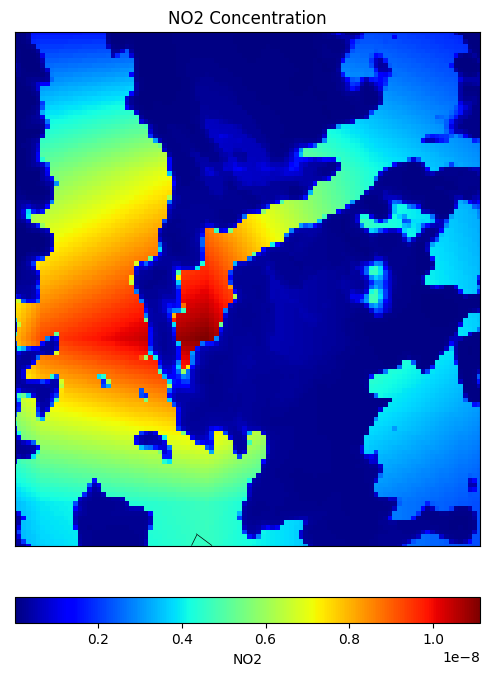

In [5]:
longitude, latitude = np.meshgrid(longitude, latitude)
x, y = mp(longitude, latitude)
plt.figure(figsize=(6,8))
c_scheme=mp.pcolor(x,y,np.squeeze(no2[0,0,:,:]),cmap='jet')

#Outline for the map
mp.drawcoastlines()
mp.drawcountries()
mp.drawstates()

#Colorbar
cbar = mp.colorbar(c_scheme,location='bottom',pad="10%")
cbar.set_label('NO2')

#Title
plt.title('NO2 Concentration')
plt.show()

In [6]:
#Size of no2 array
print(no2.shape)

(24, 6, 110, 100)


In [5]:
#To creaate a git, creating images and then creating a video from the images
#setting the path 
longitude, latitude = np.meshgrid(longitude, latitude)
x, y = mp(longitude, latitude)
plt.figure(figsize=(6,8))
for i in range(0,24):
    c_scheme=mp.pcolor(x,y,np.squeeze(no2[i,0,:,:]),cmap='jet')
    mp.drawcoastlines()
    mp.drawcountries()
    mp.drawstates()
    cbar = mp.colorbar(c_scheme,location='bottom',pad="10%")
    cbar.set_label('NO2')
    plt.title('NO2 Concentration')
    plt.savefig(r'/home/paosoriom/Universidad/Applied-Mathematics/EXPOR2/Images_for_gif_nc_2/'+'\\'+'image'+str(i)+'.jpg')
    plt.clf()

<Figure size 600x800 with 0 Axes>

In [8]:
#%pip install imageio

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 1.2 MB/s eta 0:00:0000:0100:010m
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [6]:
import imageio

In [7]:
image_frames = []
for i in range(0,24):
    filename = r'/home/paosoriom/Universidad/Applied-Mathematics/EXPOR2/Images_for_gif_nc_2/'+'\\'+'image'+str(i)+'.jpg'
    image_frames.append(imageio.imread(filename))

imageio.mimsave(r'/home/paosoriom/Universidad/Applied-Mathematics/EXPOR2/Images_for_gif_nc_2/'+'\\'+'no2_conc.gif', image_frames, fps=10)

/tmp/ipykernel_828/3690145641.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image_frames.append(imageio.imread(filename))


In [10]:
nc.variables

{'longitude': <class 'netCDF4._netCDF4.Variable'>
 float32 longitude(longitude)
     standard_name: longitude
     units: degrees_east
     _CoordinateAxisType: Lon
     bounds: longitude_bnds
 unlimited dimensions: 
 current shape = (100,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'latitude': <class 'netCDF4._netCDF4.Variable'>
 float32 latitude(latitude)
     standard_name: latitude
     units: degrees_north
     _CoordinateAxisType: Lat
     bounds: latitude_bnds
 unlimited dimensions: 
 current shape = (110,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'longitude_bnds': <class 'netCDF4._netCDF4.Variable'>
 float32 longitude_bnds(longitude, nv)
     long_name: longitude bounds
     units: degrees_east
 unlimited dimensions: 
 current shape = (100, 2)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'latitude_bnds': <class 'netCDF4._netCDF4.Variable'>
 float32 latitude_bnds(latitude, nv)
     long_name: latitude bounds
     uni